# Turo Case Study

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# Import activation data
df = pd.read_csv('./clicks-activation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94194 entries, 0 to 94193
Data columns (total 9 columns):
created_date                  94194 non-null object
location_in_query             94179 non-null object
platform                      94194 non-null object
campaign_state                94188 non-null object
in_city                       94194 non-null int64
is_p2p                        94194 non-null int64
is_rent                       94194 non-null int64
category_car_type_in_query    84335 non-null object
is_activated                  94194 non-null bool
dtypes: bool(1), int64(3), object(5)
memory usage: 5.8+ MB


In [4]:
#Identify missing values
df.isnull().sum()

created_date                     0
location_in_query               15
platform                         0
campaign_state                   6
in_city                          0
is_p2p                           0
is_rent                          0
category_car_type_in_query    9859
is_activated                     0
dtype: int64

In [5]:
#Assign label all missing values
df["category_car_type_in_query"].fillna("Missing", inplace = True) 
df["location_in_query"].fillna("Missing", inplace = True)
df["campaign_state"].fillna("Missing", inplace = True)

In [6]:
# Convert Dates to Month, Day, Weekday
from datetime import datetime
df['created_date'] =  pd.to_datetime(df['created_date'],
                              format='%m/%d/%y')
df['created_month'] = pd.DatetimeIndex(df['created_date']).month
df['created_year'] = pd.DatetimeIndex(df['created_date']).year
df['created_weekday'] = pd.DatetimeIndex(df['created_date']).weekday
df['created_dayofmonth'] = pd.DatetimeIndex(df['created_date']).day

# Exploratory Data Analysis

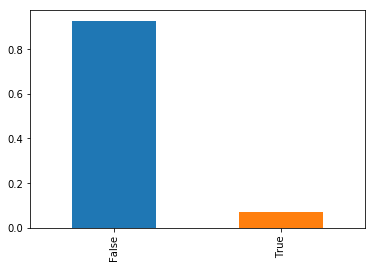

In [6]:
(df['is_activated'].value_counts()/len(df)).plot.bar()

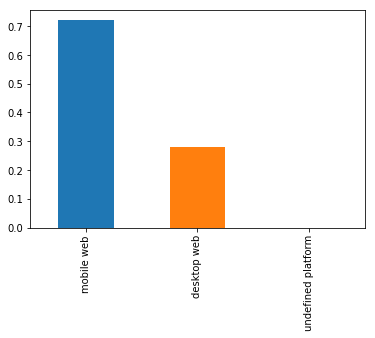

In [13]:
(df['platform'].value_counts()/len(df)).plot.bar()

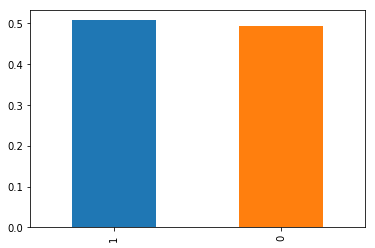

In [14]:
(df['in_city'].value_counts()/len(df)).plot.bar()

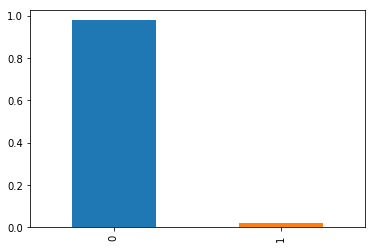

In [15]:
(df['is_p2p'].value_counts()/len(df)).plot.bar()

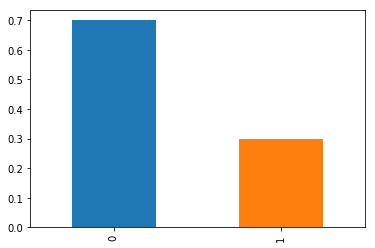

In [16]:
(df['is_rent'].value_counts()/len(df)).plot.bar()

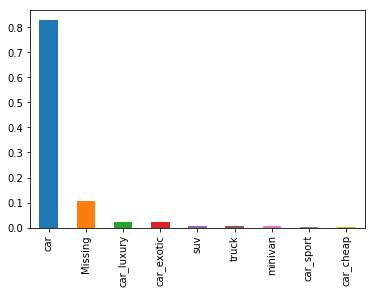

In [17]:
(df['category_car_type_in_query'].value_counts()/len(df)).plot.bar()

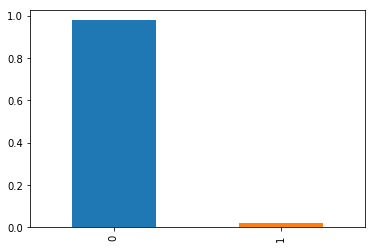

In [18]:
(df['is_p2p'].value_counts()/len(df)).plot.bar()

In [7]:
pd.crosstab(df.is_activated, df.created_weekday, normalize='columns')

created_weekday,0,1,2,3,4,5,6
is_activated,,,,,,,
False,0.933775,0.927493,0.927329,0.926474,0.926953,0.92735,0.927714
True,0.066225,0.072507,0.072671,0.073526,0.073047,0.07265,0.072286


In [8]:
pd.crosstab(df.is_activated, df.platform , normalize='columns')

platform,desktop web,mobile web,undefined platform
is_activated,,,
False,0.921346,0.930513,1.0
True,0.078654,0.069487,0.0


In [9]:
pd.crosstab(df.is_activated, df.is_p2p , normalize='columns')

is_p2p,0,1
is_activated,,
False,0.92922,0.87027
True,0.07078,0.12973


In [11]:
pd.crosstab(df.is_activated, df.is_rent , normalize='columns')

is_rent,0,1
is_activated,,
False,0.926767,0.930697
True,0.073233,0.069303


In [5]:
pd.crosstab( df.campaign_state, df.is_activated, margins=True)

is_activated,False,True,All
campaign_state,,,
730826522,1,0,1
746544610,3,0,3
746544646,1,0,1
746700134,2,0,2
Missing,6,0,6
ak,103,4,107
al,219,13,232
ar,71,3,74
az,3842,322,4164


pd.crosstab( df.location_in_query, df.is_activated, margins=True)

In [26]:
pd.crosstab(df.is_activated, df.platform , normalize='columns')

platform,desktop web,mobile web,undefined platform
is_activated,,,
False,0.921346,0.930513,1.0
True,0.078654,0.069487,0.0


In [30]:
pd.crosstab(df.is_activated, df.category_car_type_in_query, normalize='columns')

category_car_type_in_query,Missing,car,car_cheap,car_exotic,car_luxury,car_sport,minivan,suv,truck
is_activated,,,,,,,,,
False,0.913784,0.927499,0.953846,0.963893,0.962301,0.947522,0.930394,0.941482,0.94582
True,0.086216,0.072501,0.046154,0.036107,0.037699,0.052478,0.069606,0.058518,0.05418


# Data Preprocessing

In [18]:
# One Hot Encoding of Categorical variables

#Platform
DPlatform=pd.get_dummies(df['platform'], prefix='platform')
df = pd.concat([df, DPlatform], axis=1)

#category_car_type_in_query
DCarCat=pd.get_dummies(df['category_car_type_in_query'], prefix='category_car')
df = pd.concat([df, DCarCat], axis=1)

#location_in_query 
DLocation=pd.get_dummies(df['location_in_query'], prefix='location')
df = pd.concat([df, DLocation], axis=1)

#campaign_state 
DState=pd.get_dummies(df['campaign_state'], prefix='state')
df = pd.concat([df, DState], axis=1)

df["is_activated"] = df["is_activated"].astype('category')
df["is_activated_num"] = df["is_activated"].cat.codes
df.head()

In [19]:
df["is_activated"] = df["is_activated"].astype('category')
df["is_activated_num"] = df["is_activated"].cat.codes
df.head()

,created_date,location_in_query,platform,campaign_state,in_city,is_p2p,is_rent,category_car_type_in_query,is_activated,created_month,...,state_pa,state_ri,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi,is_activated_num
0,2017-12-27,san antonio,mobile web,tx,1,0,0,car,True,12,...,0,0,0,0,1,0,0,0,0,1
1,2018-01-10,honolulu,mobile web,hi,0,0,0,car,False,1,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-15,atlanta,desktop web,ga,1,0,0,car,True,12,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-06,honolulu,mobile web,hi,0,0,0,car,False,1,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-20,miami,mobile web,fl,0,0,0,car_exotic,False,12,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Drop features for dummy variables have been created
df=df.drop(['location_in_query'],axis=1)
df=df.drop(['platform'],axis=1)
df=df.drop(['campaign_state'],axis=1)
df=df.drop(['category_car_type_in_query'],axis=1)
df=df.drop(['is_activated'],axis=1)

#Drop uncessasary time series features  
df=df.drop(['created_month'],axis=1)
df=df.drop(['created_year'],axis=1)
df=df.drop(['created_date'],axis=1)

# Split data into train and test

In [25]:
X = df.drop('is_activated_num', 1)
y= df['is_activated_num']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

# Build Predictive Models

In [31]:
# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Model 1: Logistic Regression

In [38]:
logreg= LogisticRegression(max_iter=1000, solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

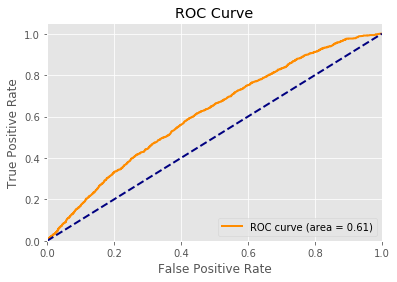

In [39]:
# AUROC for Logistic Regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = logreg.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Log loss
from sklearn.metrics import log_loss
lr_probs = logreg.predict_proba(X_test)
score = log_loss(y_test, lr_probs)
print(score)

0.2551354962371596


In [130]:
# Feature Importance

[Text(0,0,'location_falls church'),
 Text(0,0,'location_riverview'),
 Text(0,0,'location_teaneck'),
 Text(0,0,'location_carlsbad'),
 Text(0,0,'location_spokane international airport'),
 Text(0,0,'location_austell'),
 Text(0,0,'location_livonia'),
 Text(0,0,'location_round rock'),
 Text(0,0,'location_bridgeport'),
 Text(0,0,'location_asheville')]

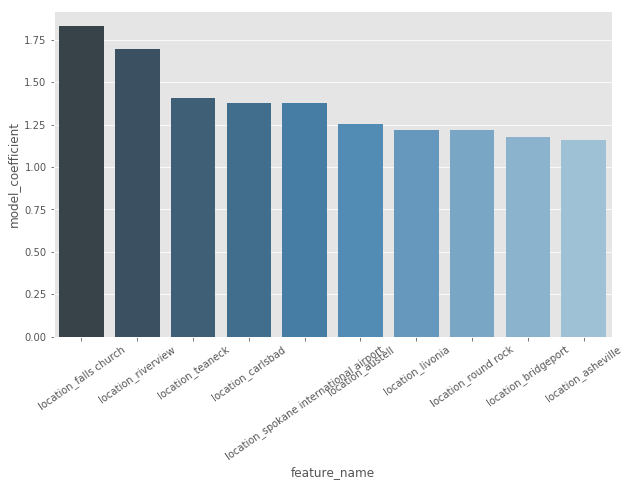

In [41]:
# Get the models coefficients (and top 10)
full_col_names = list(X_train.columns) 
logReg_coeff = pd.DataFrame({'feature_name': full_col_names, 'model_coefficient': logreg.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(10)

# Plot top 10 coefficients
plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=logReg_coeff_top.feature_name)

In [44]:
#Confusion Matrix
y_pred_lr = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lr)

array([[17469,     0],
       [ 1370,     0]])

In [45]:
#Classfication Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr ))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17469
           1       0.00      0.00      0.00      1370

   micro avg       0.93      0.93      0.93     18839
   macro avg       0.46      0.50      0.48     18839
weighted avg       0.86      0.93      0.89     18839



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# Time to score Test Sample
import time
start = time.time()
y_pred_lr=logreg.predict(X_test)
end = time.time()
print(end - start)

0.06857490539550781


# Model 2: XGBoost

In [47]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [48]:
xgb1 = XGBClassifier(objective= 'binary:logistic', n_estimators=1000)

In [49]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

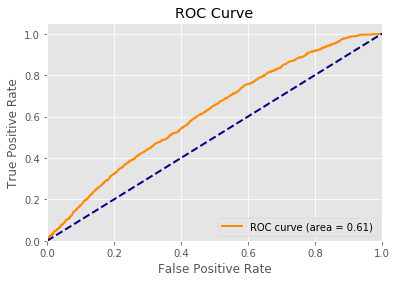

In [50]:
from sklearn.metrics import roc_curve
y_pred_xgb=xgb1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Log Loss
from sklearn.metrics import log_loss
xg_probs = xgb1.predict_proba(X_test)
score = log_loss(y_test, xg_probs)
print(score)

0.25438292776938165


In [52]:
# Time to score Test Sample
import time
start = time.time()
y_pred_xgb=xgb1.predict(X_test)
end = time.time()
print(end - start)

0.7474749088287354


# Model 3: LightGBM

In [61]:
import lightgbm as lgbm

In [62]:
d_train = lgbm.Dataset(X_train, label=y_train)

In [63]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [64]:
evals_result = {}

In [65]:
clf = lgbm.train(params, d_train, 1000)
y_pred_lgbm=clf.predict(X_test)

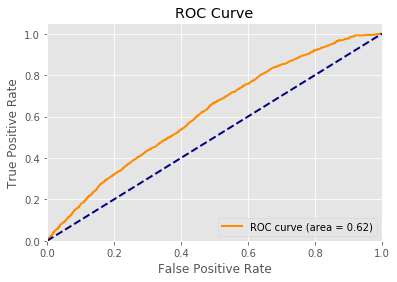

In [66]:
from sklearn.metrics import roc_curve
y_pred_lgbm=clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgbm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
from sklearn.metrics import log_loss
lgbm_probs = y_pred_lgbm
score = log_loss(y_test, lgbm_probs)
print(score)

0.25454661096517994


In [68]:
# Time to score Test Sample
import time
start = time.time()
y_pred_lgbm=clf.predict(X_test)
end = time.time()
print(end - start)

1.3524281978607178
